# Part I - Ford GoBike Data Exploration
## by Ryan Sikhrangkur

## Introduction

This document explores a dataset of more than 180,000 trips made using the Ford GoBike system containing time and locations in the San Fransisco Bay area from February of 2019 to March of 2019.

> **Table of Contents**
- [Preliminary Wrangling](#Preliminary-Wrangling)
- [Data Adjustment & Manipulation](#Data-Adjustment-Manipulation)
- [Univariate Exploration](#Univariate-Exploration)
- [Bivariate Exploration](#Bivariate-Exploration)
- [Multivariate Exploration](#Multivariate-Exploration)
- [Conclusions](#Conclusions)


## Preliminary Wrangling <a class="anchor" id="Preliminary-Wrangling">


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

%matplotlib inline

In [2]:
df_gobike = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
df_gobike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
df_gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
df_gobike.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [6]:
df_gobike.shape

(183412, 16)

In [7]:
df_gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
type(df_gobike['start_time'][0]), type(df_gobike['end_time'][0])

(str, str)

In [9]:
df_gobike['duration_sec'].max(), df_gobike[df_gobike.duration_sec<3600].count()[0] / df_gobike.count()[0]

(85444, 0.99067672780406957)

In [10]:
pd.to_datetime(df_gobike['start_time']).dt.year.value_counts(), pd.to_datetime(df_gobike['end_time']).dt.year.value_counts()

(2019    183412
 Name: start_time, dtype: int64, 2019    183412
 Name: end_time, dtype: int64)

In [11]:
pd.to_datetime(df_gobike['start_time']).dt.month.value_counts(), pd.to_datetime(df_gobike['end_time']).dt.month.value_counts()

(2    183412
 Name: start_time, dtype: int64, 2    183396
 3        16
 Name: end_time, dtype: int64)

In [12]:
len(df_gobike[df_gobike.duration_sec > 3600]), len(df_gobike[df_gobike.duration_sec > 3600])/len(df_gobike)

(1710, 0.009323272195930474)

In [13]:
pd.to_datetime(df_gobike['start_time']).dt.hour.value_counts(), pd.to_datetime(df_gobike['end_time']).dt.hour.value_counts()

(17    21864
 8     21056
 18    16827
 9     15903
 16    14169
 7     10614
 19     9881
 15     9174
 12     8724
 13     8551
 10     8364
 14     8152
 11     7884
 20     6482
 21     4561
 6      3485
 22     2916
 23     1646
 0       925
 5       896
 1       548
 2       381
 4       235
 3       174
 Name: start_time, dtype: int64, 17    21295
 8     19782
 18    18264
 9     17684
 16    13179
 19    10730
 10     8977
 15     8835
 7      8779
 12     8617
 13     8522
 14     8157
 11     7587
 20     6922
 21     4866
 22     3240
 6      2967
 23     1834
 0      1003
 5       759
 1       566
 2       422
 4       236
 3       189
 Name: end_time, dtype: int64)

In [14]:
df_gobike['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [15]:
df_gobike.query('user_type=="Subscriber"')['bike_share_for_all_trip'].value_counts()

No     146185
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [16]:
df_gobike.query('user_type=="Customer"')['bike_share_for_all_trip'].value_counts()

No    19868
Name: bike_share_for_all_trip, dtype: int64

In [17]:
df_gobike.query('start_station_id!=start_station_id')['start_station_latitude'].value_counts()

37.41    101
37.40     63
37.42     21
37.39     11
37.38      1
Name: start_station_latitude, dtype: int64

In [18]:
df_gobike.query('start_station_id != start_station_id')['start_station_longitude'].value_counts()

-121.94    57
-121.96    46
-121.93    46
-121.95    37
-121.92    10
-121.98     1
Name: start_station_longitude, dtype: int64

### What is the structure of your dataset?

There are 183,412 records with 16 features detailing:
- Time a trip starts and ends, and its duration.
- The latitude and longitude locations of the stations where trips start and end.
- Station names and IDs, and bike IDs, if available.
- User type, user gender, user birth year, and if the trip made was a bike share for all trip.

### What is/are the main feature(s) of interest in your dataset?

I am most interest in trends of the Ford GoBike's use, primarily I would like to see the relationship of how long trips take with distance traveled. By investigating how long and how far trips are made, I can expand into other relationships with features such as when the trips are made and by who.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To support exploring these features I think it would be best to focus on the trip durations, the start time of trips, user types, and the station latitudes and longitudes.

## Data Adjustment & Manipulation <a class="anchor" id="Data-Adjustment-Manipulation">

I need more information starting with pieces of information that can be found in the time features like the day of week and the hour of day the trips were made. I'll need to change the start and end times from a `str` datatype to `datetime`, and because less than 1% of the dataset exceeds a duration of one hour I'll extract the hour of day and day of week the trips are made and add them to the dataset as their own features.

In [19]:
df_gobike['start_time'] = pd.to_datetime(df_gobike['start_time'])
df_gobike['end_time'] = pd.to_datetime(df_gobike['end_time'])

df_gobike['weekday'] = df_gobike['start_time'].dt.day_name()
df_gobike['trip_hour'] = df_gobike['start_time'].dt.hour

The bike share for all feature is a sub-option for subscribers, which is why no customers have the feature flagged as true or "yes". I'd like to simplify observing the trips by changing the user type from subscriber to Bike Share for All for those trips where it's flagged as true.

In [20]:
df_gobike.loc[df_gobike['bike_share_for_all_trip']=='Yes', 'user_type'] = 'Bike Share for All'
df_gobike = df_gobike.drop('bike_share_for_all_trip', axis=1)
df_gobike['user_type'].value_counts()

Subscriber            146185
Customer               19868
Bike Share for All     17359
Name: user_type, dtype: int64

I want to calculate these relationships with distance as well, but the dataset doesn't actually include a distance. With the latitude and longitude coordinates of the endpoints of trips, I can use the [Haversine formula] to calculate a direct distance between station (in meters). I'll also check for and exclude any trips where the distance traveled isn't greater than zero, and calculate the travel rates in meters/seconds.

In [21]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371) :
    if to_radians :
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
        
    a = np.sin((lat2-lat1)/2.0) ** 2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0) ** 2
    
    return (earth_radius * 2 * np.arcsin(np.sqrt(a))) * 1000

df_gobike['distance_m'] = \
    haversine(df_gobike.start_station_latitude,df_gobike.start_station_longitude,
              df_gobike.end_station_latitude,df_gobike.end_station_longitude)

df_gobike['distance_m'].describe()

count    183412.000000
mean       1690.659008
std        1097.588997
min           0.000000
25%         910.955336
50%        1430.737708
75%        2225.686841
max       69469.240682
Name: distance_m, dtype: float64

In [22]:
df_gobike[df_gobike.distance_m==0].count()[0]

3880

In [23]:
df_gobike = df_gobike[df_gobike.distance_m>0]
df_gobike['distance_m'].min()

13.287318088158383

In [24]:
df_gobike['m_per_sec'] = df_gobike['distance_m'] / df_gobike['duration_sec']

## Univariate Exploration <a class="anchor" id="Univariate-Exploration">
    
I'll start with the percentage of user types, and then focus on my two numerical features of travel duration and distance.

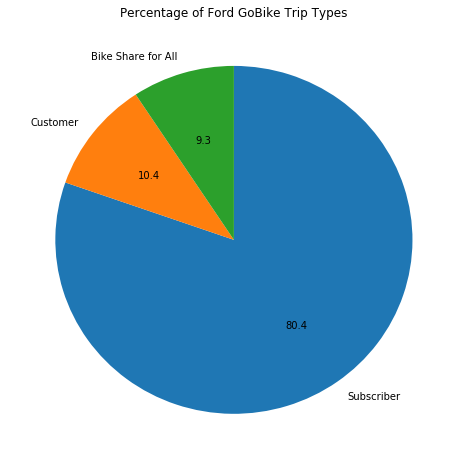

In [25]:
user_counts = df_gobike['user_type'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(user_counts, labels=user_counts.index, autopct='%.1f', startangle=90, counterclock=False)
plt.title('Percentage of Ford GoBike Trip Types')
plt.show();

This is the percentage of trip types. Recalling that Bike Share for All is an option for trips for only subscribers, that would mean 89.4% of the total users in this dataset were subscribers.

In [26]:
ordinal_var_dict = {'member_gender': ['Male', 'Female', 'Other'],
                    'user_type': ['Customer', 'Subscriber', 'Bike Share for All'],
                    'weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    df_gobike[var] = df_gobike[var].astype(ordered_var)

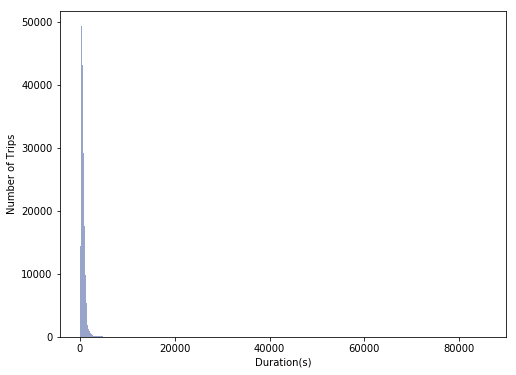

In [27]:
# Create a binsize = 200
binsize = 200
bins = np.arange(0, df_gobike['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=(8,6))
dur_plot = sb.distplot(df_gobike['duration_sec'], bins=bins, kde=False, color=sb.color_palette('dark')[0])
dur_plot.set(xlabel='Duration(s)', ylabel='Number of Trips')
plt.show();

A logarithmic scale will help me see the distribution of that large spike in trips with more clarity.

In [28]:
np.log10(df_gobike['duration_sec'].describe())

count    5.254142
mean     2.844595
std      3.218893
min      1.785330
25%      2.511883
50%      2.708421
75%      2.894870
max      4.931682
Name: duration_sec, dtype: float64

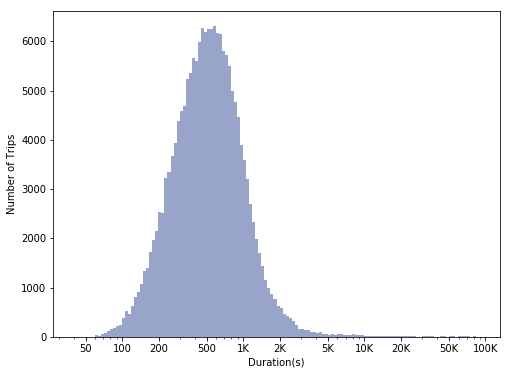

In [29]:
log_binsize = 0.025
bins = 10 ** np.arange(1.6, np.log10(df_gobike['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=(8,6))
dur_plot = sb.distplot(df_gobike['duration_sec'], bins=bins, kde=False, color=sb.color_palette('dark')[0])
plt.xscale('log')
dur_plot.set_xticks([50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5])
dur_plot.set_xticklabels([50, 100, 200, 500, '1K', '2K', '5K', '10K', '20K', '50K', '100K'])
dur_plot.set(xlabel='Duration(s)', ylabel='Number of Trips')
plt.show();

Under the log scale it's clear that trip duration is unimodal with a peak of approximately 500 seconds.

In [30]:
df_gobike['distance_m'].describe()

count    179532.000000
mean       1727.197102
std        1080.568655
min          13.287318
25%         941.053423
50%        1460.585845
75%        2253.556782
max       69469.240682
Name: distance_m, dtype: float64

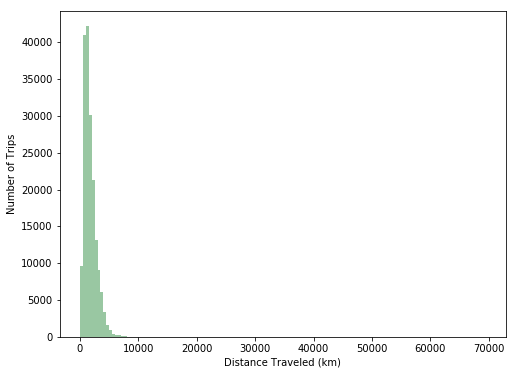

In [31]:
binsize = 500
bins = np.arange(0, df_gobike['distance_m'].max()+binsize, binsize)

plt.figure(figsize=(8,6))
travelplot = sb.distplot(df_gobike['distance_m'], bins=bins, kde=False, color=sb.color_palette('dark')[1])
travelplot.set(xlabel='Distance Traveled (km)', ylabel='Number of Trips')
plt.show()

Unlike trip time I don't think a logarithmic scale will be necessary to have a better view of this data. Instead I'll shrink the binsize and limit the range of the x-axis.

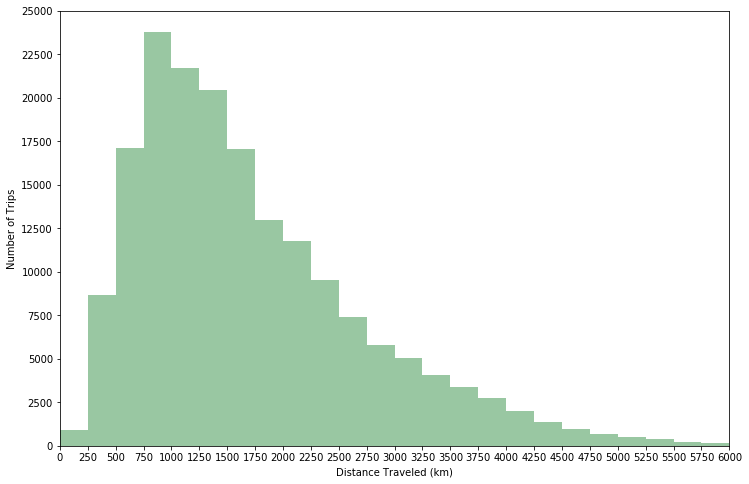

In [32]:
binsize = 250
bins = np.arange(0, 6500, binsize)
plt.figure(figsize=(12,8))
travelplot = sb.distplot(df_gobike['distance_m'], bins=bins, kde=False, color=sb.color_palette('dark')[1])
travelplot.set(xlabel='Distance Traveled (km)', ylabel='Number of Trips')
travelplot.set_xticks(np.arange(0, 6500, 250))
travelplot.set_xticklabels(np.arange(0, 6500, 250))
travelplot.set_yticks(np.arange(0, 25001, 2500))
travelplot.set_yticklabels(np.arange(0, 25001, 2500))
plt.xlim(0, 6001)
plt.show();

Finally I want to look at the number of trips made accumulatively, by day of week.

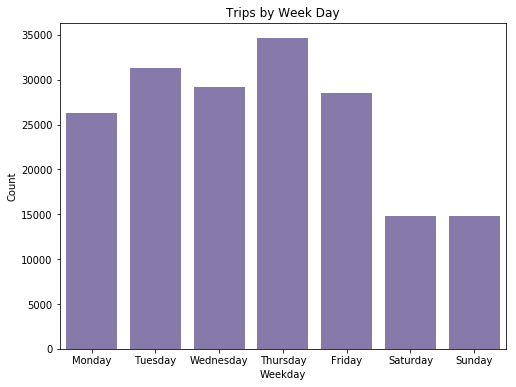

In [33]:
plt.figure(figsize=(8,6))

weekday_count = sb.countplot(data=df_gobike, x='weekday', color=sb.color_palette('deep')[3])
weekday_count.set(xlabel='Weekday', ylabel='Count')
plt.title('Trips by Week Day')
plt.show();

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

At first glance duration_sec is skewed to the right with a single large peak, however under a log-scale the data is unimodal with a normal distribution peaking between 400 to 750 seconds.

The distance_m is also skewed to the right. The data shows most trips were between 250 and 2500 meters in length.

89.7% of trips in the dataset were made by subscribers, and 9.3% of those were Bike Share for All trips.

There are more than 25000 trips accumulated for every day of the week with the exception of Saturday and Sunday having less than 15000 each.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I changed subscribers in the user type feature  changed the value of all observations in the `user_type` column to "Bike Share for All" if they had a value of "Yes" in the  `bike_share_for_all_trip` column. The `bike_share_for_all_trip` was dropped. I made these changes to better reflect the nature of each observation of the dataset.

I changed the datatype of the `start_time` and `end_time` columns from *str* to *datetime* so that I can extract specific parts of the timestamp.
- I created a `Weekday` column to investigate any trend in the span of a week.
    
Using the `start_station_latitude`, `start_station_longitude`, `end_station_latitude` and `end_station_longitude` columns, I calculated the distance of each observation and saved it in a new column `distance_m`.

There are a total of 3880 observations of users who did not travel any distance with a Ford GoBike. These observations were removed.

## Bivariate Exploration <a class="anchor" id="Bivariate-Exploration">
    
The first and primary relationship I'll explore is trip time vs. trip distance because these are our numeric values, and will continue to be my primary focus for other relationships with categorical features.

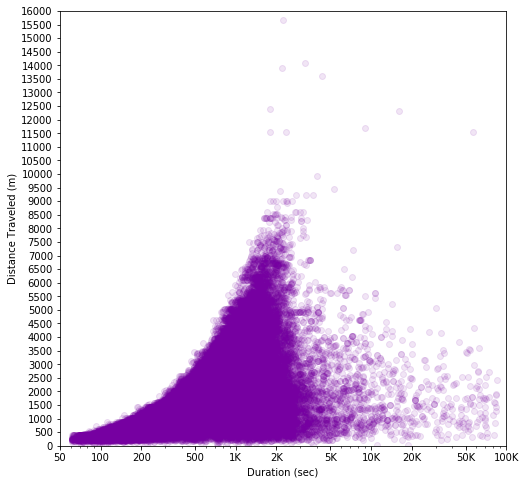

In [34]:
plt.figure(figsize=(8,8))
trip_plot = sb.regplot(data=df_gobike, x='duration_sec', y='distance_m', fit_reg=False,
                       color=sb.color_palette('dark')[3], scatter_kws={'alpha':1/10})
trip_plot.set(xlabel='Duration (sec)', ylabel='Distance Traveled (m)')
plt.xscale('log')
trip_plot.set_xticks([50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5])
trip_plot.set_xticklabels([50, 100, 200, 500, '1K', '2K', '5K', '10K', '20K', '50K', '100K'])
plt.xlim(50,1e5)
trip_plot.set_yticks(np.arange(0,16001,500))
trip_plot.set_yticklabels(np.arange(0,16001,500))
plt.ylim(0,16001)
plt.show();

A majority of the data is concentrated in somewhat of a triangular shape under an exponential curve. By applying the same adjustments I did towards these features when I observed them separately, I should have a better view of what the data looks like in that concentrated shape.

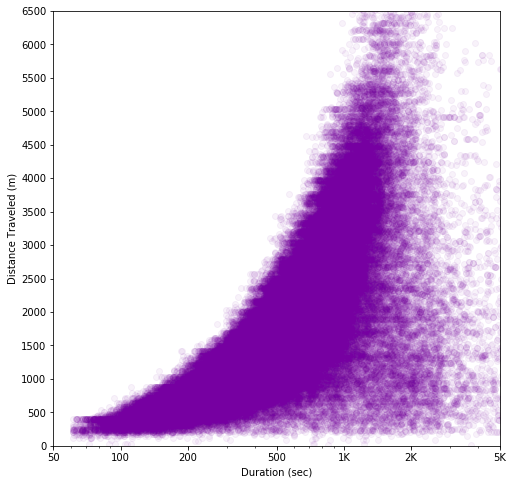

In [35]:
plt.figure(figsize=(8,8))
trip_plot = sb.regplot(data=df_gobike, x='duration_sec', y='distance_m', fit_reg=False,
                       color=sb.color_palette('dark')[3], scatter_kws={'alpha':1/20})
trip_plot.set(xlabel='Duration (sec)', ylabel='Distance Traveled (m)')
plt.xscale('log')
trip_plot.set_xticks([50, 100, 200, 500, 1e3, 2e3, 5e3])
trip_plot.set_xticklabels([50, 100, 200, 500, '1K', '2K', '5K'])
plt.xlim(50,5e3)
trip_plot.set_yticks(np.arange(0,6501,500))
trip_plot.set_yticklabels(np.arange(0,6501,500))
plt.ylim(0,6501)
plt.show();

The concentration is less of a triangular shape, and instead is an exponential curve where the downward slope was populated by a cluster of scattered plots.

In [36]:
numeric_vars = ['duration_sec', 'distance_m', 'start_station_latitude', 'start_station_longitude',
                'end_station_latitude', 'end_station_longitude']
categoric_vars = ['weekday', 'user_type']

In [37]:
def log_trans(x, inverse=False) :
    if not inverse :
        return np.log10(x)
    else :
        return np.power(10,x)

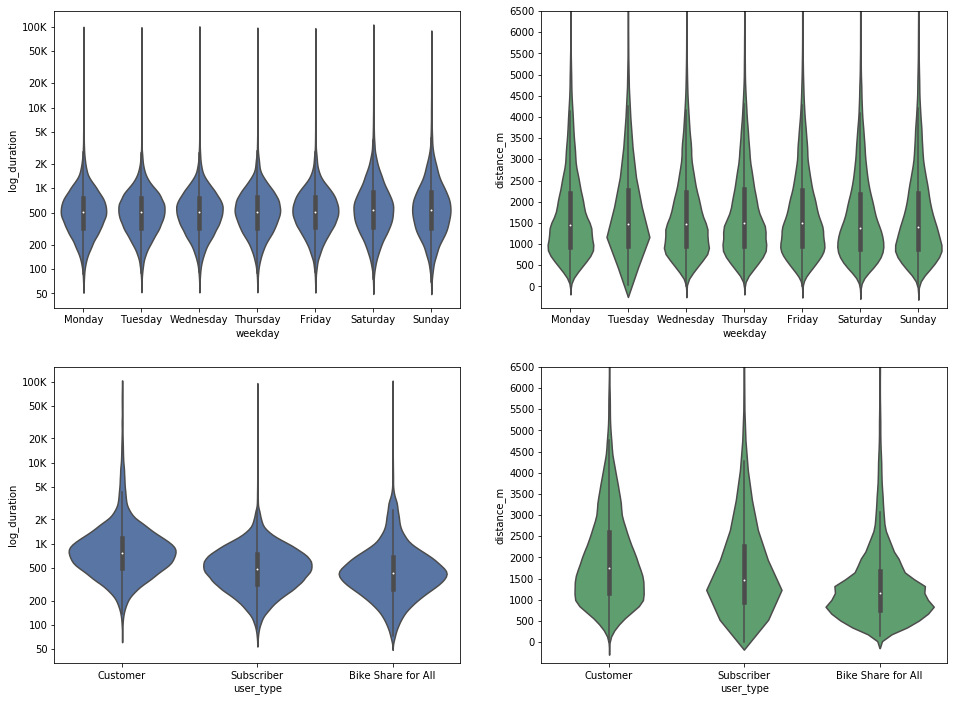

In [38]:
df_gobike['log_duration'] = df_gobike['duration_sec'].apply(log_trans)
fig, ax = plt.subplots(ncols = 2, nrows = 2 , figsize = [16,12])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data=df_gobike, x=var, y='log_duration', ax=ax[i,0], color=sb.color_palette('deep')[0])
    ax[i,0].set_yticks(log_trans(np.array([50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5])))
    ax[i,0].set_yticklabels([50, 100, 200, 500, '1K', '2K', '5K', '10K', '20K', '50K', '100K'])
    
    sb.violinplot(data=df_gobike, x=var, y='distance_m', ax=ax[i,1], color=sb.color_palette('deep')[1])
    ax[i,1].set_yticks(np.arange(0, 6501, 500))
    ax[i,1].set_yticklabels(np.arange(0, 6501, 500))
    ax[i,1].set_ylim(-500,6500)

plt.show()

Weekday vs. trip duration and trip distance are both fairly uniform in shape and spread. In contrast, user type vs. time duration has a similar shape but shifts values downward from one type to the next, and the shape of user type vs. trip distance shows a decrease in trips made in the upper values and a wider lower bound.

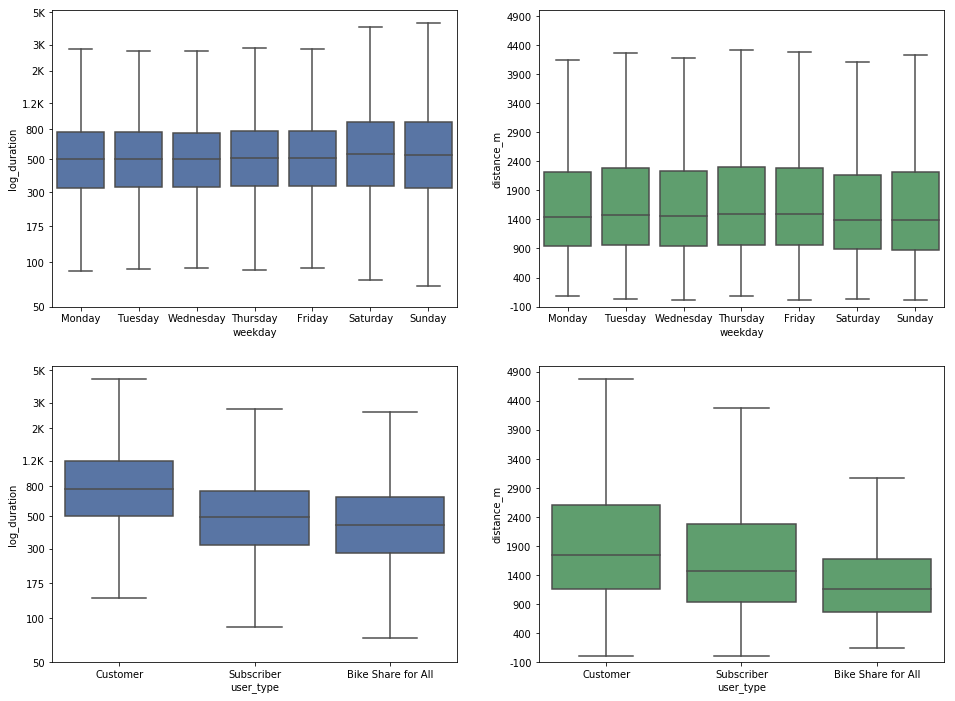

In [39]:
fig, ax = plt.subplots(ncols = 2, nrows = 2 , figsize = [16,12])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.boxplot(data=df_gobike, x=var, y='log_duration', ax=ax[i,0], showfliers=False, color=sb.color_palette('deep')[0])
    ax[i,0].set_yticks(log_trans(np.array([50, 100, 175, 300, 500, 800, 1200, 2e3, 3e3, 5e3])))
    ax[i,0].set_yticklabels([50, 100, 175, 300, 500, 800, '1.2K', '2K', '3K', '5K'])
    
    sb.boxplot(data=df_gobike, x=var, y='distance_m', ax=ax[i,1], showfliers=False, color=sb.color_palette('deep')[1])
    ax[i,1].set_yticks(np.arange(-100, 5000, 500))
    ax[i,1].set_yticklabels(np.arange(-100, 5000, 500))
    ax[i,1].set_ylim(-100,5000)

plt.show()

Just as I saw with the violin plots, using box plots to display the same relationships delivers the same results. The key relationship which does look different as a box plot would be user type vs. time distance, but while it looks different the information is the same - across user types the range of values shrinks and the majority of values shifts towards the lower bound.

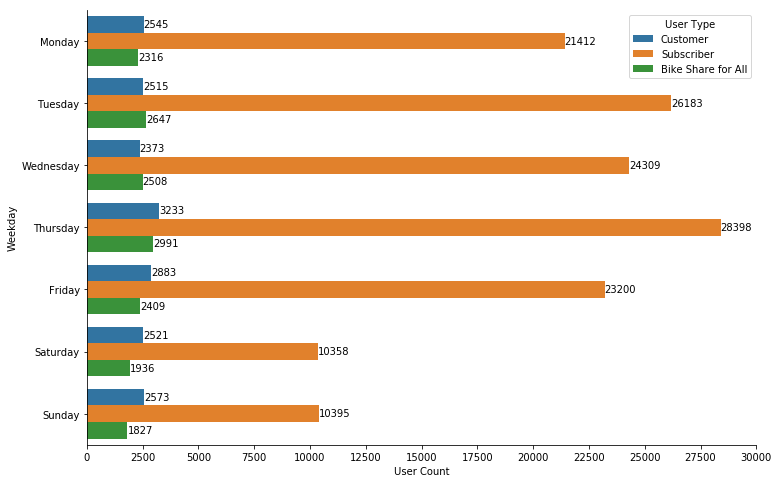

In [40]:
plt.figure(figsize=(12,8))
ax = sb.countplot(data=df_gobike, y='weekday', hue='user_type')
ax.set(xlabel='User Count', ylabel='Weekday')
ax.set_xticks(np.arange(0,30001,2500))
ax.set_xticklabels(np.arange(0,30001,2500))
ax.legend(title='User Type')
sb.despine()

for p in ax.patches:
        x = p.get_x() + p.get_width() +0.5
        y = p.get_y() + p.get_height() / 1.5
        ax.annotate(p.get_width(),(x,y))
        
plt.show();

By detailing count by weekday based on user type, I can see the decrease of subscribers for Saturday and Sunday is approximately the same as the previous decrease in trips made during my univariate exploration.

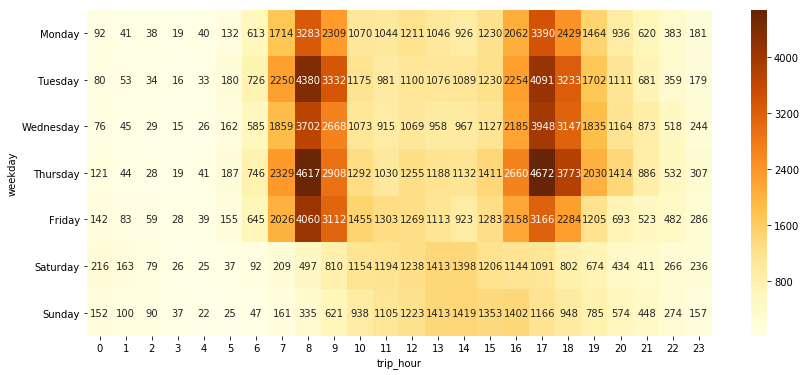

In [41]:
plt.figure(figsize=(14,6))
ax = sb.heatmap(df_gobike.groupby('weekday')['trip_hour'].value_counts().unstack(), 
           annot=True, fmt='.0f', cmap='YlOrBr');

Most trips made Monday thru Friday are between two four-hour intervals from 7:00 to 11:00 and again from 16:00 to 20:00.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
When I first investigated trip duration vs. distance in a scatterplot, it appeared to me that the information was concentrated under an exponential curve at a height of 10K meters before decreasing and forming almost a triangle shape. However upon adjusting the scale and limits of the relationship, I saw that the concentration only existed in the upward curve forming a crescent shape reaching a height of 6K meters at roughly 1800 seconds before the data becomes more scattered.

The violin plots reveal trip duration and distance are both evenly spread across every day of the week, with a longer spread of data for Saturday and Sunday. Trip duration by user type shows a fairly uniform data spread, but the shape shifts downward to lower duration values from Customer > Subscriber > Bike Share for All. Trip distance shows a similar shift in values, but also there are less trips with a larger travel distance from Customer > Subscriber > Bike Share for All, resulting in a wider shape for lower values.

The box plots support what I see in the violin plots, with the shifting values for user types but also a decrease in range of values.

By clustering the weekday bar chart by user type, it becomes clear that the decrease of trips previously found for Saturday and Sunday is near equal to the decrease in subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
There is some positive correlation as I expected between trip duration and trip distance.

Looking at the heatmap for the amount of trips per hour by day of the week, I notice the majority of these trips were made surrounding the traditional weekday hours of Monday thru Friday, between the hours of 7:00 and 10:00 then again between the hours of 16:00 and 20:00.

## Multivariate Exploration <a class="anchor" id="Multivariate-Exploration">

For the multivariate exploration I'll be limiting the exploration to a sample based on what I observe in time duration vs. time distance. The sample will include all observations that have a duration from 60 to 2000 seconds, and a distance from 100 to 6000 meters, to confine the exploration to the curve seen previously. This restriction still includes 97.3% of the dataset.

In [42]:
# Remove a majority of the outliers for the average summaries by creating a new dataset
# The boundaries of this new dataset will be determined by the exponential curve noted by the scatterplot of time vs distance

duration_sample = (df_gobike['duration_sec']>=60) & (df_gobike['duration_sec']<=2000)
distance_sample = (df_gobike['distance_m']>=100) & (df_gobike['distance_m']<=6000)
gobike_spl = df_gobike.loc[(duration_sample & distance_sample),:]
gobike_spl.count()[0] / df_gobike.count()[0]

0.97287948666532986

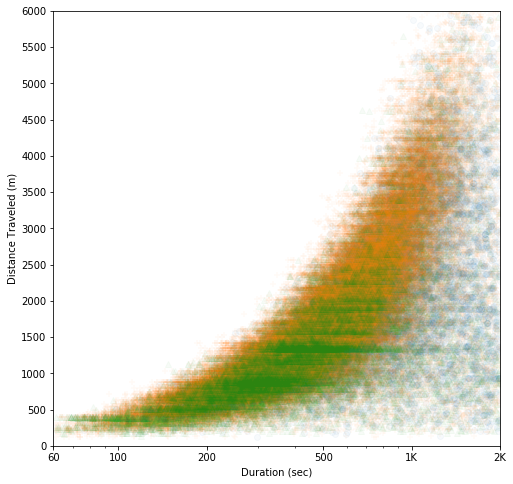

In [43]:
plt.figure(figsize=(8,8))
ttype_markers = [['Customer', 'o'],
                ['Subscriber', '+'],
                ['Bike Share for All', '^']]
for ttype, marker, in ttype_markers:
    gobike_plot = gobike_spl.loc[gobike_spl['user_type']==ttype]
    sb.regplot(data=gobike_plot, x='duration_sec', y='distance_m', x_jitter=0.04, fit_reg=False,
               scatter_kws={'alpha':1/30}, marker=marker)
plt.xscale('log')
plt.xticks([60, 100, 200, 500, 1e3, 2e3], [60, 100, 200, 500, '1K', '2K'])
plt.xlim(60,2e3)
plt.xlabel('Duration (sec)')
plt.yticks(np.arange(0,6001,500), np.arange(0,6001,500))
plt.ylim(0,6001)
plt.ylabel('Distance Traveled (m)')
plt.show();

Subscribers take the majority of the positive curve while customers are scattered throughout.

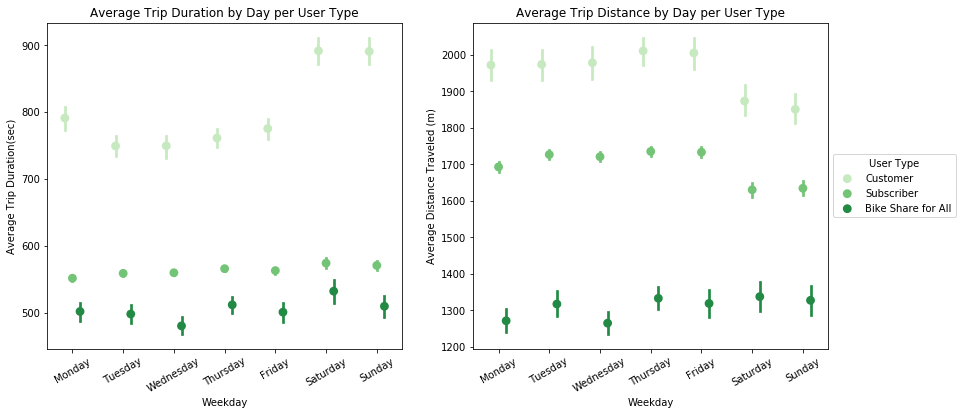

In [44]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
time_avg = sb.pointplot(data=gobike_spl, x='weekday', y='duration_sec', hue='user_type',
                 palette='Greens', linestyles='', dodge=0.3)
time_avg.set(xlabel='Weekday', ylabel='Average Trip Duration(sec)')
time_avg.set_xticklabels(time_avg.get_xticklabels(), rotation=30)
time_avg.legend([],[],frameon=False)
plt.title('Average Trip Duration by Day per User Type')

plt.subplot(1,2,2)
dist_avg = sb.pointplot(data=gobike_spl, x='weekday', y='distance_m', hue='user_type',
                 palette='Greens', linestyles='', dodge=0.3)
dist_avg.set(xlabel='Weekday', ylabel='Average Distance Traveled (m)')
dist_avg.set_xticklabels(dist_avg.get_xticklabels(), rotation=30)
dist_avg.legend(title='User Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average Trip Distance by Day per User Type')

plt.show();

Customers on average take the longest trips and travel the longest distances for all weekdays.

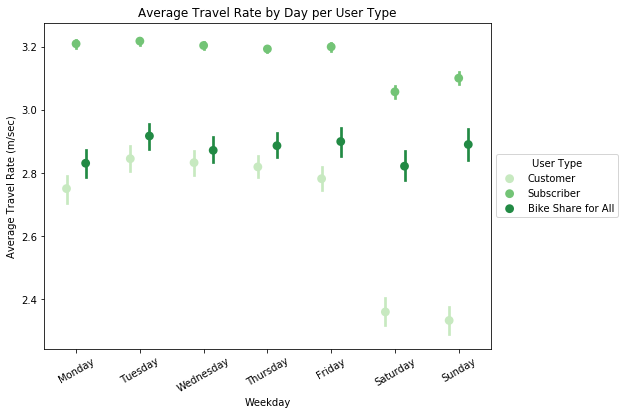

In [45]:
plt.figure(figsize=(8,6))
ax = sb.pointplot(data=gobike_spl, x='weekday', y='m_per_sec', hue='user_type',
                 palette='Greens', linestyles='', dodge=0.3)
ax.set(xlabel='Weekday', ylabel='Average Travel Rate (m/sec)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.legend(title='User Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average Travel Rate by Day per User Type')
plt.show();

Subscribers have the highest average travel rate, whereas customers have the lowest.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


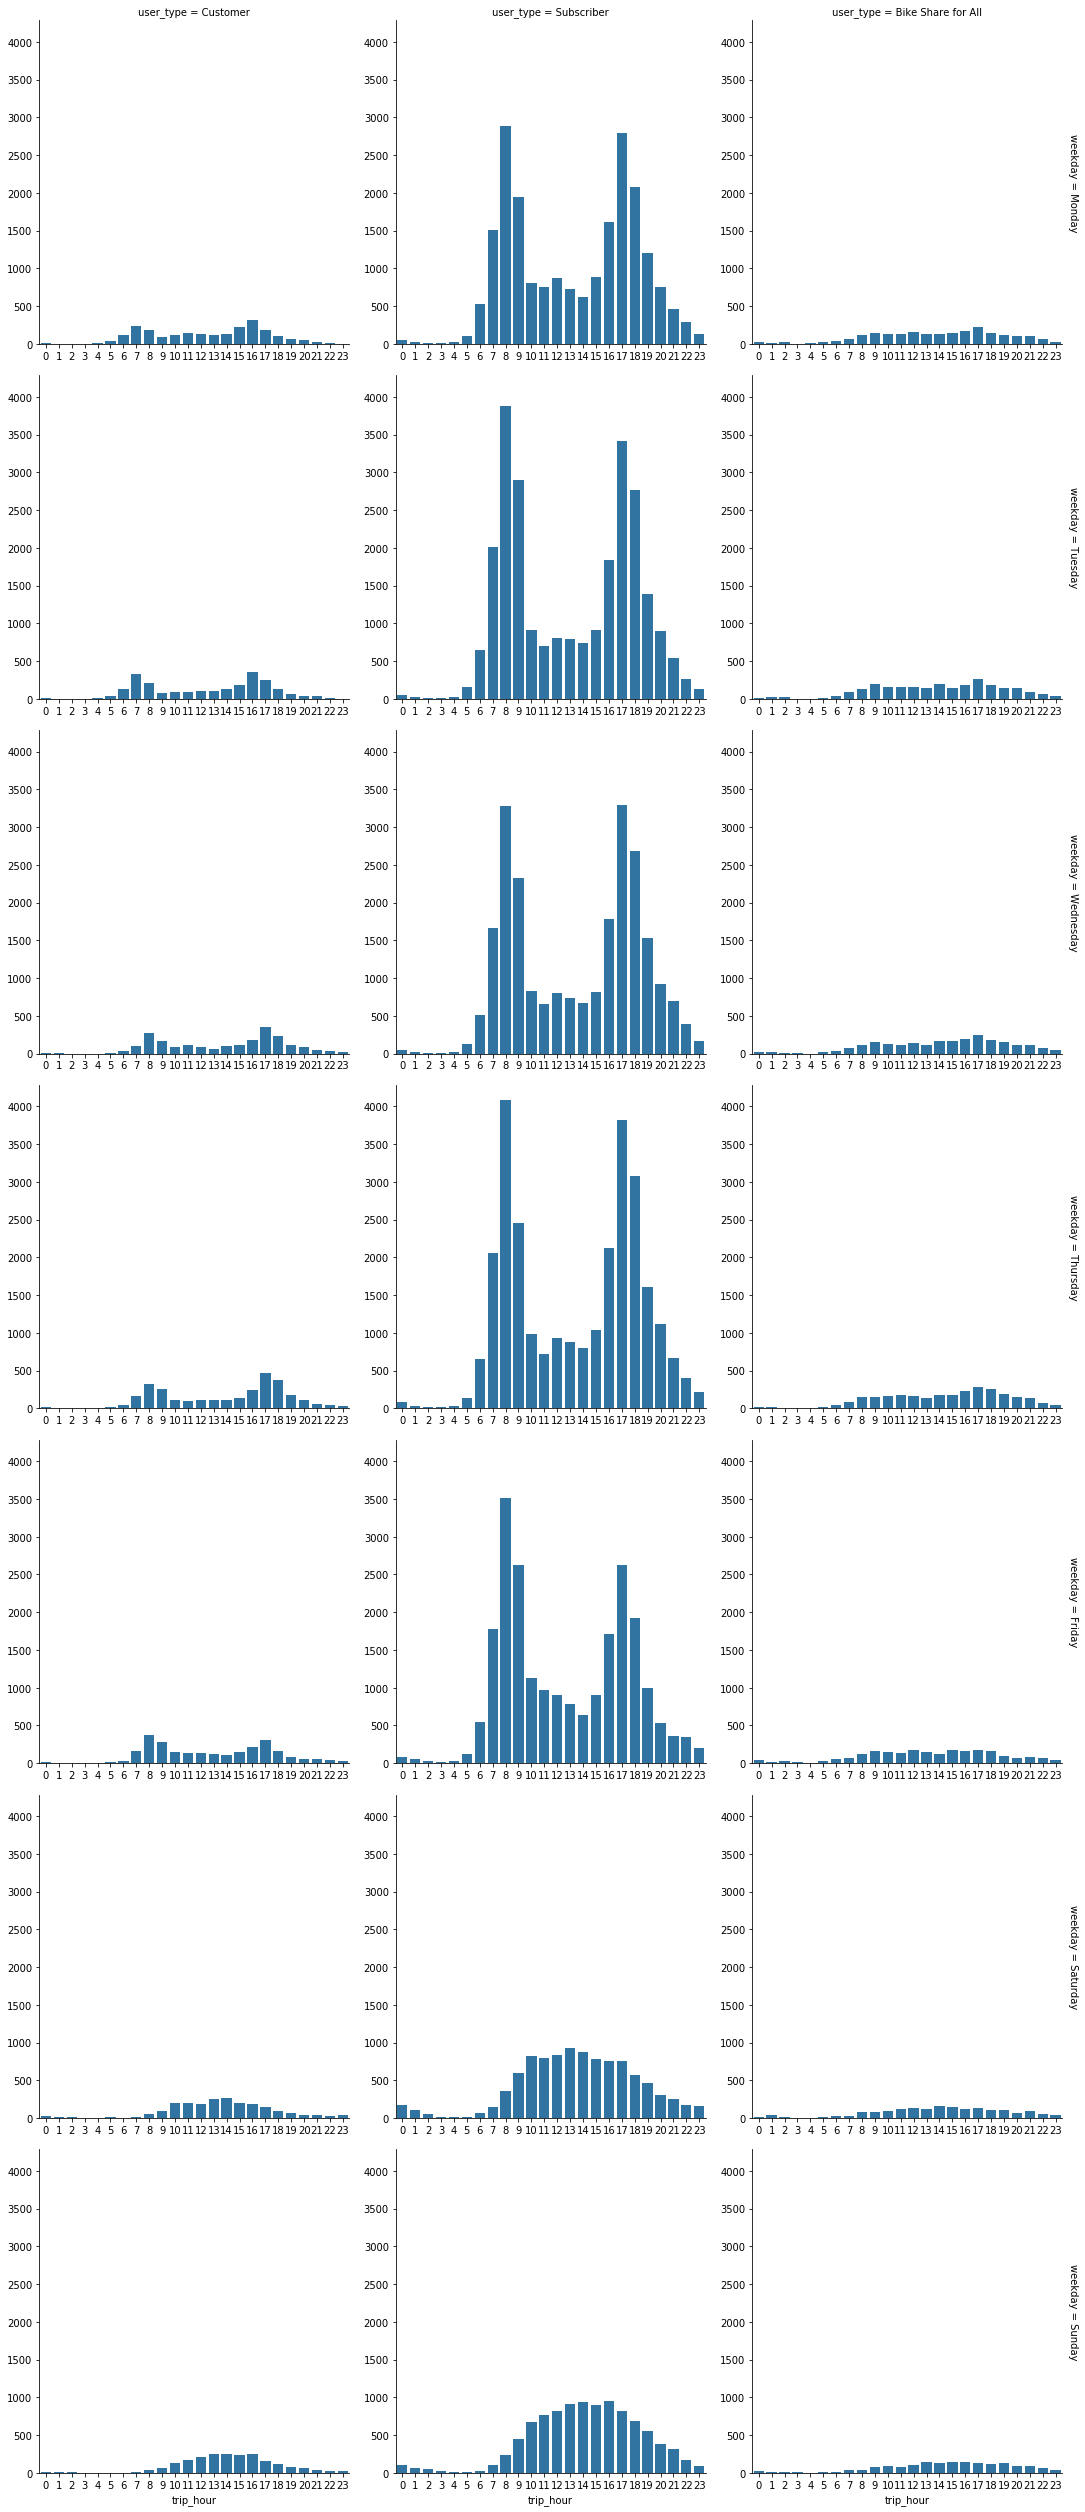

In [46]:
g = sb.FacetGrid(gobike_spl, col='user_type', row='weekday', margin_titles=True, size=5)
g.map(sb.countplot, 'trip_hour');

Subscriber trips are the most popular made across all hours and days. Of note, most of the trips made by subscribers are done so between the hours of 7:00 to 9:00 and the hours of 16:00 to 18:00 Monday thru Friday, with trips made between those hours remaining consistent for all days.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
When looking at trip duration vs. trip distance scatterplot again with user type, nearly the entire exponential curve is occupied by subscribers showing a strong relationship for that user type, whereas customers are scattered mostly underneath the curve.

I observed through a pointplot that customers have the highest average trip durations and distances traveled for all days of the week. Subscribers have the most condensed confidence intervals which shows more consistency.

By using a facet grid to view a breakdown of hourly ride patterns by weekday and user type, subscribers make up nearly all traffic I've previously seen for Monday thru Friday during typical work day commuting hours at 7:00 - 10:00 and again at 16:00 - 19:00.

### Were there any interesting or surprising interactions between features?
Bike share trips also show a strong relationship along the lower values of the exponential curve. This suggests that customers have the least consistency of their trips, which is supported by having the lowest travel rate of user types despite having the highest trip duration and distance averages.

Subscribers don't exclusively travel during commuting hours, but account for the most trips made for every hour of every weekday.

## Conclusions <a class="anchor" id="Conclusions">
    


From my investigations I can include that all trends and relationships of the dataset are exclusive to the trips made by subscribers.